In [16]:
import sklearn as sk

In [17]:
import pandas as pd

In [18]:
from sklearn.datasets import dump_svmlight_file

In [19]:
df = pd.read_csv("D:/Work/datascience-ws/dataset/kaggle/titanic/train.csv")

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
obj_df = df.select_dtypes(include=['object']).copy()

In [22]:
obj_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


In [23]:
obj_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
cleanup_nums = {"Sex":     {"male": 1, "female": 0}}
obj_df.replace(cleanup_nums, inplace=True)

In [25]:
obj_df.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",1,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",0,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,113803,C123,S
4,"Allen, Mr. William Henry",1,373450,NaN,S


In [26]:
df["family_ppl_count"] = df["SibSp"] + df["Parch"]

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_ppl_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
df.dtypes

PassengerId           int64
Survived              int64
Pclass                int64
Name                 object
Sex                  object
Age                 float64
SibSp                 int64
Parch                 int64
Ticket               object
Fare                float64
Cabin                object
Embarked             object
family_ppl_count      int64
dtype: object

In [29]:
obj_df2=df[['Age','Fare','family_ppl_count']]

In [30]:
obj_df2.head()

,Age,Fare,family_ppl_count
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [31]:
df['Age_bins'] = pd.cut(df.Age, bins=8)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_ppl_count,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,"(20.315, 30.263]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,"(30.263, 40.21]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,"(20.315, 30.263]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,"(30.263, 40.21]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,"(30.263, 40.21]"


In [33]:
pd.value_counts(df['Age_bins'])

(20.315, 30.263]    230
(30.263, 40.21]     155
(10.368, 20.315]    115
(40.21, 50.158]      86
(0.34, 10.368]       64
(50.158, 60.105]     42
(60.105, 70.052]     17
(70.052, 80.0]        5
Name: Age_bins, dtype: int64

In [34]:
 df[["Age_bins", "Survived"]].groupby("Age_bins").mean()

,Survived
Age_bins,
"(0.34, 10.368]",0.593750
"(10.368, 20.315]",0.382609
"(20.315, 30.263]",0.365217
"(30.263, 40.21]",0.445161
"(40.21, 50.158]",0.383721
"(50.158, 60.105]",0.404762
"(60.105, 70.052]",0.235294
"(70.052, 80.0]",0.200000


In [35]:
import matplotlib.pyplot as plt

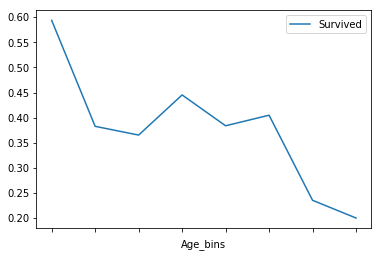

In [36]:
cols = ["Age_bins", "Survived"]
df[cols].groupby("Age_bins").mean().plot()

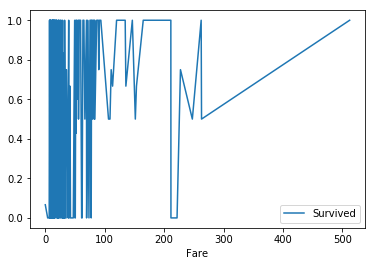

In [37]:
cols = ["Fare","Survived"]
df[cols].groupby("Fare").mean().plot()

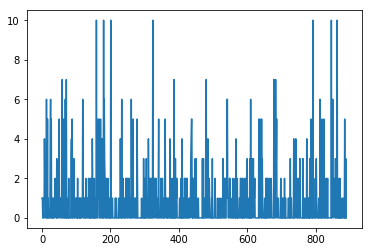

In [38]:
df["family_ppl_count"].plot()